In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

%precision 3
%matplotlib inline

In [2]:
df = pd.read_csv('../data/ch12_scores_reg.csv')
n = len(df)
print(n)
df.head()

20


,quiz,final_test,sleep_time,school_method
0,4.2,67,7.2,bus
1,7.2,71,7.9,bicycle
2,0.0,19,5.3,bus
3,3.0,35,6.8,walk
4,1.5,35,7.5,walk


1. 단순 회귀 모형

In [3]:
x = np.array(df['quiz'])
y = np.array(df['final_test'])
p = 1

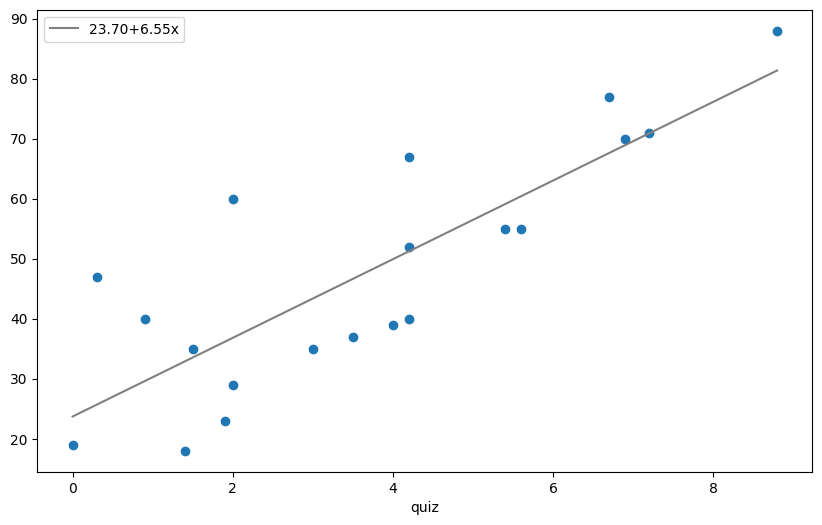

In [4]:
poly_fit = np.polyfit(x,y,1)
poly_1d = np.poly1d(poly_fit)

xs = np.linspace(x.min(), x.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('quiz')
ax.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(x,y)
ax.legend()
plt.show()

- 1-2. statsmodels에 의한 회귀분석

In [5]:
formula = 'final_test ~ quiz'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           8.59e-06
Time:                        03:24:21   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# 첫 번째 열은 1, 두 번째 열은 x인 행렬 생성

X = np.array([np.ones_like(x), x]).T
X

array([[1. , 4.2],
       [1. , 7.2],
       [1. , 0. ],
       [1. , 3. ],
       [1. , 1.5],
       [1. , 0.9],
       [1. , 1.9],
       [1. , 3.5],
       [1. , 4. ],
       [1. , 5.4],
       [1. , 4.2],
       [1. , 6.9],
       [1. , 2. ],
       [1. , 8.8],
       [1. , 0.3],
       [1. , 6.7],
       [1. , 4.2],
       [1. , 5.6],
       [1. , 1.4],
       [1. , 2. ]])

In [7]:
# 최소 제곱법

beta0_hat, beta1_hat = np.linalg.lstsq(X,y)[0]
beta0_hat,beta1_hat

/var/folders/7n/pm50m3212tq_hg29f8q2fdh00000gn/T/ipykernel_15953/1960601886.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta0_hat, beta1_hat = np.linalg.lstsq(X,y)[0]


(23.699, 6.554)

In [9]:
# 잔차 계산

y_hat = beta0_hat + beta1_hat * x
eps_hat = y - y_hat

In [10]:
# 회귀계수의 수가 2이므로 자유도는 n-2

s_var = np.var(eps_hat, ddof=p+1)
s_var

134.290

In [12]:
# 구간 추정

C0, C1 = np.diag(np.linalg.pinv(np.dot(X.T, X)))

In [14]:
# 표본 오차

np.sqrt(s_var * C0), np.sqrt(s_var*C1)

(4.714, 1.069)

In [16]:
# 95% 신뢰구간

rv = stats.t(n-2)

lcl = beta0_hat - rv.isf(0.025)*np.sqrt(s_var * C0)
hcl = beta0_hat - rv.isf(0.975) * np.sqrt(s_var * C0)
lcl, hcl

(13.796, 33.603)